<a href="https://colab.research.google.com/github/akashlal72/laptoppriceprdiction/blob/main/Laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd #importing dataset and performing data analysis
import seaborn as sns #for data visulaisation
import matplotlib.pyplot as plt #for data visulisation
import string #for puntuation mark cleaning

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset.csv",encoding='latin-1')    #importing dataset
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [3]:
df.info()    #finding information of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [4]:
# from above information we conclude that:
#1 There are no null values in the dataset
#2 All the varibale are categoricle variable (Note: Inches is also categorical variable because we have standard set of laptop size)
#3 Dependendt variable laptop price 

In [5]:
df["Inches"].value_counts()   #checking inches column for categorical variable 
#note:from this we can infere that inch column can also be tretated as categorical variable

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

In [6]:
df.describe()    #describing the dataset

,laptop_ID,Inches,Price_euros
count,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,1123.686992
std,381.172104,1.426304,699.009043
min,1.000000,10.100000,174.000000
25%,331.500000,14.000000,599.000000
50%,659.000000,15.600000,977.000000
75%,990.500000,15.600000,1487.880000
max,1320.000000,18.400000,6099.000000


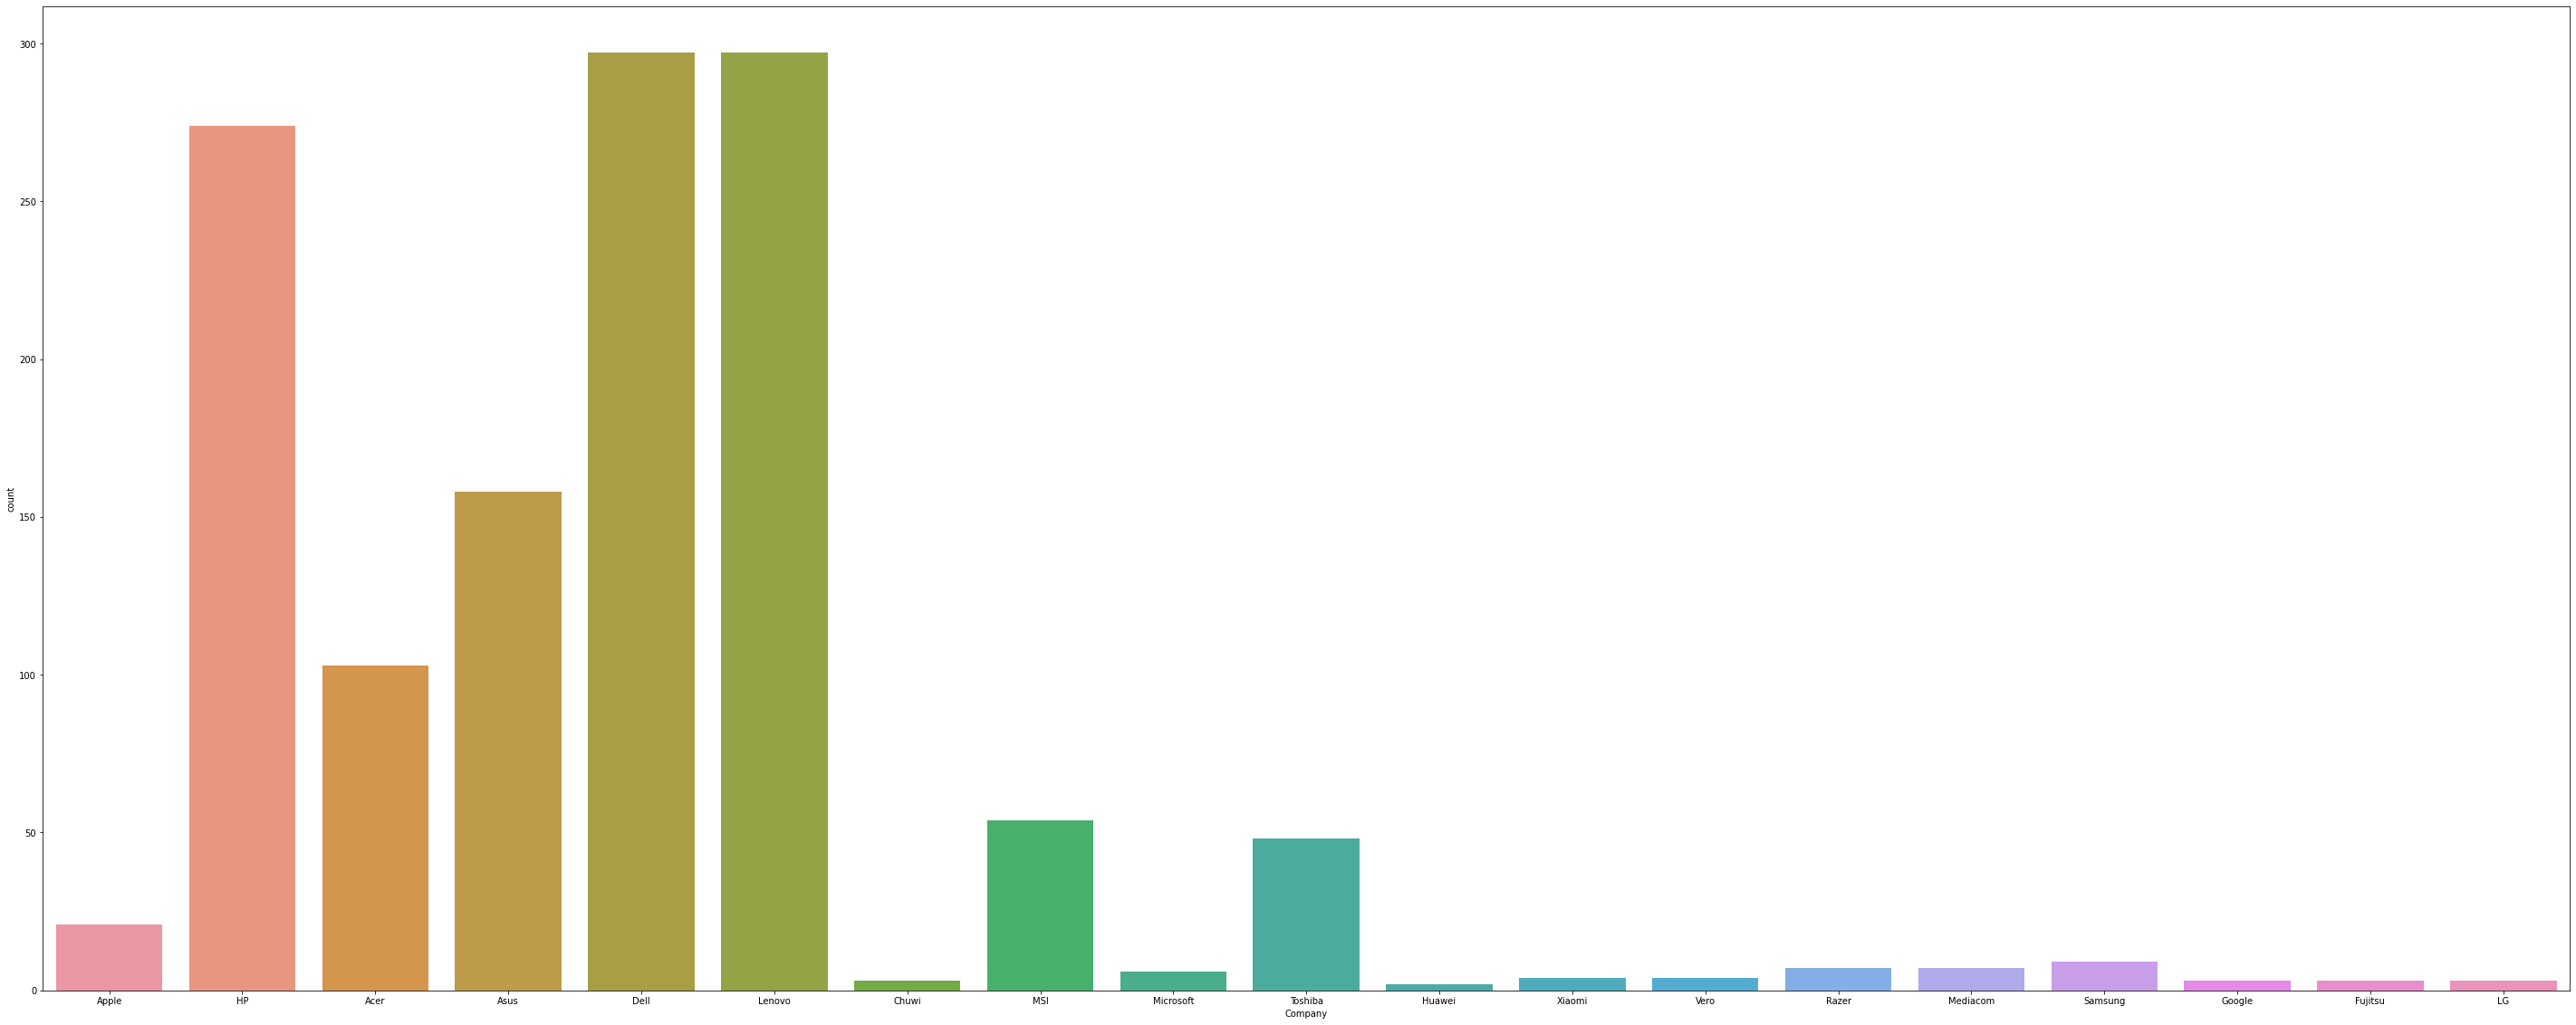

In [7]:
plt.figure(figsize=(50,20))    #Sizing the plot 
sns.countplot(x="Company",data=df);   #countplot to see the distribution of company

In [8]:
print(df["Company"].value_counts())  #counting the number of company
print("Number of unique company = " ,df["Company"].unique().shape)    #finding number of unique companies

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64
Number of unique company =  (19,)


In [9]:
print(df["TypeName"].value_counts())  #counting the number of type of laptop
print("Number of unique typeName = " ,df["TypeName"].unique().shape)    #finding number of unique type of laptop

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64
Number of unique typeName =  (6,)


In [10]:
print(df["TypeName"].value_counts())  #counting the number of type of laptop
print("Number of unique typeName = " ,df["TypeName"].unique().shape)    #finding number of unique type of laptop

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64
Number of unique typeName =  (6,)


# Data cleaning process

In [11]:
def extract_resolution(text):      #function to extract resolution from column
    resolution = text.split(" ")[-1] #extracting resolution
    width, height = resolution.split("x")  #split function with the separator "x"
    width = int(width)  #width and height converted into string
    height = int(height)
    resolution_value = (width*height)    
    return resolution_value

In [12]:
df["ScreenResolution"]=df["ScreenResolution"].apply(extract_resolution)    #extracting resolution

In [13]:
def extract_digit(text):  #function to extract digit
    ans="".join([i for i in text if i.isdigit()])    #spliting the text and extracting all digit
    return ans

In [14]:
column=["Ram","Weight"]   #list of column from where we need to extract digit
for i in column:         
    df[i]=df[i].apply(extract_digit)   #applying extract_digit on column

In [15]:
df["Ram"]=df["Ram"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   int64  
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 132.5+ KB


## Converting memory column separate

In [16]:
df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [17]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)   #removing .0 from the memory column

In [18]:
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

In [19]:
dummy = df["Memory"].str.split("+", n = 1, expand = True)
df["first"]= dummy[0]
df["first"]=df["first"].str.strip()
df["second"]= dummy[1]



In [20]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [21]:
df['first'] = df['first'].str.replace(r'\D', '')
df["second"].fillna("0", inplace = True)

<ipython-input-21-873bb58bfddd>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D', '')


In [22]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [23]:
df['second'] = df['second'].str.replace(r'\D', '')
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

<ipython-input-23-f6764f41b2ae>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D', '')


In [24]:
df["Total_Memory"]=(df["first"]*(df["Layer1HDD"]+df["Layer1SSD"]+df["Layer1Hybrid"]+df["Layer1Flash_Storage"])+df["second"]*(df["Layer2HDD"]+df["Layer2SSD"]+df["Layer2Hybrid"]+df["Layer2Flash_Storage"]))
df["Memory"]=df["Total_Memory"]

In [25]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [26]:
df=df.drop(['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage','Total_Memory'],axis=1)

In [27]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage
0,1,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,137,1339.69,0,128,0,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,134,898.94,0,0,0,128
2,3,HP,250 G6,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,186,575.00,0,256,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,183,2537.45,0,512,0,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,137,1803.60,0,256,0,0


# Extracting CPU Company, Speed and processor

In [28]:
df["Cpu_Speed"] = df["Cpu"].str.split(" ").apply(lambda x: x[-1]).str.replace("GHz", "")
df["Cpu_Vender"] = df["Cpu"].str.split(" ").apply(lambda x: x[0])
df["Cpu_Type"] = df["Cpu"].str.split(" ").apply(lambda x: x[1:4] if x[1] == "Celeron" and "Pentium" and "Xeon" else (x[1:3] if (x[1] == "Core" or x[0] == "AMD") else x[0]) )
df["Cpu_Type"] = df["Cpu_Type"].apply(lambda x: ' '.join(x))
df["Cpu_Type"]
df["Cpu_Speed"]=df["Cpu_Speed"].astype(float)
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage,Cpu_Speed,Cpu_Vender,Cpu_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,137,1339.69,0,128,0,0,2.3,Intel,Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,134,898.94,0,0,0,128,1.8,Intel,Core i5
2,3,HP,250 G6,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,186,575.00,0,256,0,0,2.5,Intel,Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,183,2537.45,0,512,0,0,2.7,Intel,Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,137,1803.60,0,256,0,0,3.1,Intel,Core i5


#GPU Company and Type Extract

In [29]:
gpu_distribution_list = df["Gpu"].str.split(" ")
df["Gpu_Vender"] = df["Gpu"].str.split(" ").apply(lambda x: x[0])
df["Gpu_Type"] = df["Gpu"].str.split(" ").apply(lambda x: x[1:])
df["Gpu_Type"] = df["Gpu_Type"].apply(lambda x: ' '.join(x))
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage', 'Cpu_Speed',
       'Cpu_Vender', 'Cpu_Type', 'Gpu_Vender', 'Gpu_Type'],
      dtype='object')

In [30]:
df=df.reindex(columns=['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage', 'Cpu_Speed',
       'Cpu_Vender', 'Cpu_Type', 'Gpu_Vender', 'Gpu_Type','Price_euros'])
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,HDD,SSD,Hybrid,Flash_Storage,Cpu_Speed,Cpu_Vender,Cpu_Type,Gpu_Vender,Gpu_Type,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,...,0,128,0,0,2.3,Intel,Core i5,Intel,Iris Plus Graphics 640,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,...,0,0,0,128,1.8,Intel,Core i5,Intel,HD Graphics 6000,898.94
2,3,HP,250 G6,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,...,0,256,0,0,2.5,Intel,Core i5,Intel,HD Graphics 620,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,...,0,512,0,0,2.7,Intel,Core i7,AMD,Radeon Pro 455,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,...,0,256,0,0,3.1,Intel,Core i5,Intel,Iris Plus Graphics 650,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,2073600,Intel Core i7 6500U 2.5GHz,4,128,Intel HD Graphics 520,...,0,128,0,0,2.5,Intel,Core i7,Intel,HD Graphics 520,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,5760000,Intel Core i7 6500U 2.5GHz,16,512,Intel HD Graphics 520,...,0,512,0,0,2.5,Intel,Core i7,Intel,HD Graphics 520,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1049088,Intel Celeron Dual Core N3050 1.6GHz,2,64,Intel HD Graphics,...,0,0,0,64,1.6,Intel,Celeron Dual Core,Intel,HD Graphics,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1049088,Intel Core i7 6500U 2.5GHz,6,1000,AMD Radeon R5 M330,...,1000,0,0,0,2.5,Intel,Core i7,AMD,Radeon R5 M330,764.00


In [31]:
df.drop(["Cpu","Gpu"],axis=1,inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   int64  
 6   Ram               1303 non-null   int64  
 7   Memory            1303 non-null   int64  
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  HDD               1303 non-null   int64  
 11  SSD               1303 non-null   int64  
 12  Hybrid            1303 non-null   int64  
 13  Flash_Storage     1303 non-null   int64  
 14  Cpu_Speed         1303 non-null   float64
 15  Cpu_Vender        1303 non-null   object 
 16  Cpu_Type          1303 non-null   object 


In [46]:
df["Weight"] = df["Weight"].astype("float")   #convering Wight to float

In [33]:
print(df["Company"].unique().shape)
print(df["TypeName"].unique().shape)
print(df["Cpu_Vender"].unique().shape)
print(df["Cpu_Speed"].unique().shape)
print(df["Gpu_Vender"].unique().shape)
print(df["Gpu_Type"].unique().shape)
print(df["OpSys"].unique().shape)
print(df["Product"].unique().shape)

(19,)
(6,)
(3,)
(25,)
(4,)
(110,)
(9,)
(618,)


## Bivariant analaysis:


1.   Checking with all categorical variable if there is any relationship with Depended Variable





In [44]:
df.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Ram', 'Memory', 'OpSys', 'Weight', 'HDD', 'SSD',
       'Hybrid', 'Flash_Storage', 'Cpu_Speed', 'Cpu_Vender', 'Cpu_Type',
       'Gpu_Vender', 'Gpu_Type', 'Price_euros'],
      dtype='object')

In [34]:
one_hot_typeName=pd.get_dummies(df["TypeName"])
df1=pd.concat([df, one_hot_typeName], axis=1)
df1.drop("TypeName",axis=1,inplace=True)
df1.columns

Index(['laptop_ID', 'Company', 'Product', 'Inches', 'ScreenResolution', 'Ram',
       'Memory', 'OpSys', 'Weight', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage',
       'Cpu_Speed', 'Cpu_Vender', 'Cpu_Type', 'Gpu_Vender', 'Gpu_Type',
       'Price_euros', '2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook',
       'Ultrabook', 'Workstation'],
      dtype='object')